### Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import os

In [2]:
train_data = pd.read_csv('training.csv')  
test_data = pd.read_csv('test.csv')
lookid_data = pd.read_csv('IdLookupTable.csv')

In [3]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [4]:
train_data.fillna(method = 'ffill',inplace = True)

In [5]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [6]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

The above step is in order to separate the features and  labels,here in training data the image label is features and the rest is labels.we have to find out labels in test set where only image data is given

In [7]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)


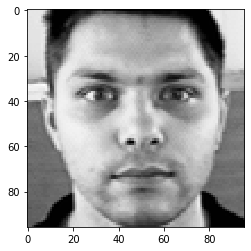

In [12]:
plt.imshow(X_train[3].reshape(96,96),cmap='gray')
plt.show()

In [13]:
training=train_data.drop('Image',axis=1)

In [14]:
y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [24]:
import tensorflow
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Convolution2D , MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout,Conv2D,MaxPool2D,ZeroPadding2D

In [25]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='SAME',input_shape=(96,96,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',kernel_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',kernel_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())




model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)       

In [26]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

### Training Model

In [28]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 54s 10ms/sample - loss: 803.5637 - mae: 21.7925 - val_loss: 405.7170 - val_mae: 14.1593
Epoch 2/50
5639/5639 [==============================] - 54s 10ms/sample - loss: 244.4125 - mae: 10.9146 - val_loss: 973.1824 - val_mae: 28.3988
Epoch 3/50
5639/5639 [==============================] - 55s 10ms/sample - loss: 139.3695 - mae: 6.9313 - val_loss: 609.4362 - val_mae: 22.2872
Epoch 4/50
5639/5639 [==============================] - 56s 10ms/sample - loss: 123.0349 - mae: 6.6890 - val_loss: 634.4989 - val_mae: 22.9364
Epoch 5/50
5639/5639 [==============================] - 56s 10ms/sample - loss: 96.8945 - mae: 5.4462 - val_loss: 366.5986 - val_mae: 16.9012
Epoch 6/50
5639/5639 [==============================] - 56s 10ms/sample - loss: 77.0368 - mae: 4.8758 - val_loss: 204.0087 - val_mae: 11.6185
Epoch 7/50
5639/5639 [==============================] - 57s 10ms/sample - loss: 60.0477 - mae:

In [29]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [30]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 

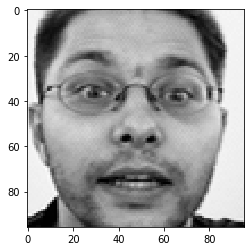

In [31]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

In [32]:
pred = model.predict(X_test)

### Lets Predict Our Results

In [33]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [34]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [35]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [36]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [37]:
rowid = pd.Series(rowid,name = 'RowId')

In [38]:
loc = pd.Series(preded,name = 'Location')

### Saving Predictinos to submission file

In [39]:
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('face_key_detection_submission.csv',index = False)